In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import cmocean as cm
import glob
from datetime import datetime, timedelta
import datetime as dt
import pandas as pd
import pickle

## looking at the Columbia flowthrough data

    problems:
    cruise ships go fast! 20 knots/ 37 km/hr 
    sampling freq.: once every 2-3 minutes
    we very rarely sample the same box (500x500m) more than once a day
    so how do we do stats on this?
    bin by 'latitude'? (boxes in this case). let's try that!) 
    

###### read data as dataframe, get relevant variables

In [16]:

# df = pd.read_csv('./Columbia/Columbia_edithead.csv')


# pco2 = df['SW pCO2 wet SST (uatm)']
# sst = df['equ temp (deg C)']
# times = df['Date and time (yyyy-mm-dd hh:mm:ss)']
# lat = df['latitude']
# lon = df['longitude']

# pco2ar = np.array(pco2)
# pco2ar = pco2ar.astype(np.float)


In [17]:
# print(times[20000:20003])
# print(lat[20000:20003])
# print(lon[20000:20003])

###### only stuff with lats < 51, convert to datetime from string

In [18]:
# # take just the ones that are in our domain

# pco2_sub51 = np.array(pco2[lat<51])
# sst_sub51 = np.array(sst[lat<51])
# dt_sub51 = np.array(times[lat<51])
# lat_sub51 = np.array(lat[lat<51])
# lon_sub51 = np.array(lon[lat<51])

# from datetime import datetime

# dts_sub51 = []
# for i in range(0,len(dt_sub51)):
#     dts_sub51.append(datetime.strptime(dt_sub51[i], '%m/%d/%y %H:%M'))

# print(np.shape(dts_sub51))

# pco2_sub51 = pco2_sub51.astype(np.float)
# sst_sub51 = sst_sub51.astype(np.float)
# lat_sub51 = lat_sub51.astype(np.float)
# lon_sub51 = lon_sub51.astype(np.float)


###### find i and j and also make a 1-number cell-of-model address as iii.jjj 

In [19]:
# print(i_sub51[0:200])

In [20]:
# i_sub51 = np.zeros_like(lon_sub51)
# j_sub51 = np.zeros_like(lon_sub51)
# decdesc_sub51 = np.zeros_like(lon_sub51)


# mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
# grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# nav_lon = mesh.variables['nav_lon'][:]
# nav_lat = mesh.variables['nav_lat'][:]
# bathy = mesh.variables['Bathymetry'][:]
# depth = grid.variables['gdept_1d'][:]


# for i in range(0,len(lat_sub51)):
#     if i%500 ==0 :
#         print(i)
#     j_sub51[i], i_sub51[i] = \
#     geo_tools.find_closest_model_point(lon_sub51[i],lat_sub51[i],nav_lon,nav_lat)
#     decdesc_sub51[i] = i_sub51[i]+j_sub51[i]/1000
    

###### remove nans and pickle

In [21]:
# decdesc_sub51_nn = decdesc_sub51[~np.isnan(decdesc_sub51)]
# i_sub51_nn = i_sub51[~np.isnan(decdesc_sub51)]
# j_sub51_nn = j_sub51[~np.isnan(decdesc_sub51)]
# pco2_sub51_nn = pco2_sub51[~np.isnan(decdesc_sub51)]
# sst_sub51_nn = sst_sub51[~np.isnan(decdesc_sub51)]
# lat_sub51_nn = lat_sub51[~np.isnan(decdesc_sub51)]
# lon_sub51_nn = lon_sub51[~np.isnan(decdesc_sub51)]

# dts_sub51ar = np.array(dts_sub51)
# dts_sub51_nn = dts_sub51ar[~np.isnan(decdesc_sub51)]

# pickle.dump(decdesc_sub51_nn, open("./pkls/decdesc_sub51.pkl", 'wb'))
# pickle.dump(i_sub51_nn, open("./pkls/i_sub51.pkl", 'wb'))
# pickle.dump(j_sub51_nn, open("./pkls/j_sub51.pkl", 'wb'))
# pickle.dump(pco2_sub51_nn, open("./pkls/pco2_sub51.pkl", 'wb'))
# pickle.dump(sst_sub51_nn, open("./pkls/sst_sub51.pkl", 'wb'))
# pickle.dump(lat_sub51_nn, open("./pkls/lat_sub51.pkl", 'wb'))
# pickle.dump(lon_sub51_nn, open("./pkls/lon_sub51.pkl", 'wb'))
# pickle.dump(dts_sub51_nn, open("./pkls/dts_sub51.pkl", 'wb'))

###### load those pickles back and now fun can start

In [22]:
decdesc_sub51 = \
pickle.load(open('./pkls/decdesc_sub51.pkl', 'rb')) 
i_sub51 = \
pickle.load(open('./pkls/i_sub51.pkl', 'rb')) 
j_sub51 = \
pickle.load(open('./pkls/j_sub51.pkl', 'rb')) 
pco2_sub51 = \
pickle.load(open('./pkls/pco2_sub51.pkl', 'rb')) 
pco2_mod = \
pickle.load(open('./pkls/pco2_mod.pkl', 'rb')) 

sst_sub51 = \
pickle.load(open('./pkls/sst_sub51.pkl', 'rb')) 
lat_sub51 = \
pickle.load(open('./pkls/lat_sub51.pkl', 'rb')) 
lon_sub51 = \
pickle.load(open('./pkls/lon_sub51.pkl', 'rb')) 
dts_sub51 = \
pickle.load(open('./pkls/dts_sub51.pkl', 'rb')) 

In [51]:
mons = np.zeros_like(lon_sub51)
yrs = np.zeros_like(lon_sub51)
days = np.zeros_like(lon_sub51)
hrs = np.zeros_like(lon_sub51)
for i in range(0,len(mons)):
    
    mons[i] = dts_sub51[i].month
    yrs[i] = dts_sub51[i].year
    days[i] = dts_sub51[i].day
    hrs[i] = dts_sub51[i].hour

/home/tjarniko/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


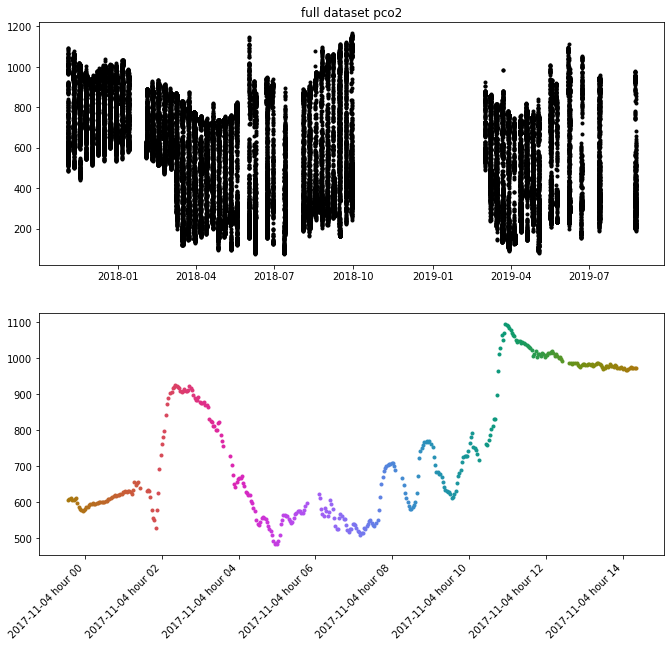

In [24]:
from matplotlib.dates import DateFormatter
tcm = cm.cm.phase
fact = 0.7 
fig, axs = plt.subplots(2,1, figsize=(16*fact, 14*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel()
\
axs[0].plot(dts_sub51,pco2_sub51, 'k.')
date_form = DateFormatter('%Y-%m')
axs[0].xaxis.set_major_formatter(date_form)
axs[0].set_title('full dataset pco2')

ar = 450; ar2 = 880
for i in range(ar,ar2):
    axs[1].plot(dts_sub51[i],pco2_sub51[i], marker = '.',\
                color = tcm((i-ar)/(ar2-ar)))
date_form = DateFormatter("%Y-%m-%d hour %H")
axs[1].xaxis.set_major_formatter(date_form)
w = plt.xticks(rotation=45, ha='right')

In [40]:
 %%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


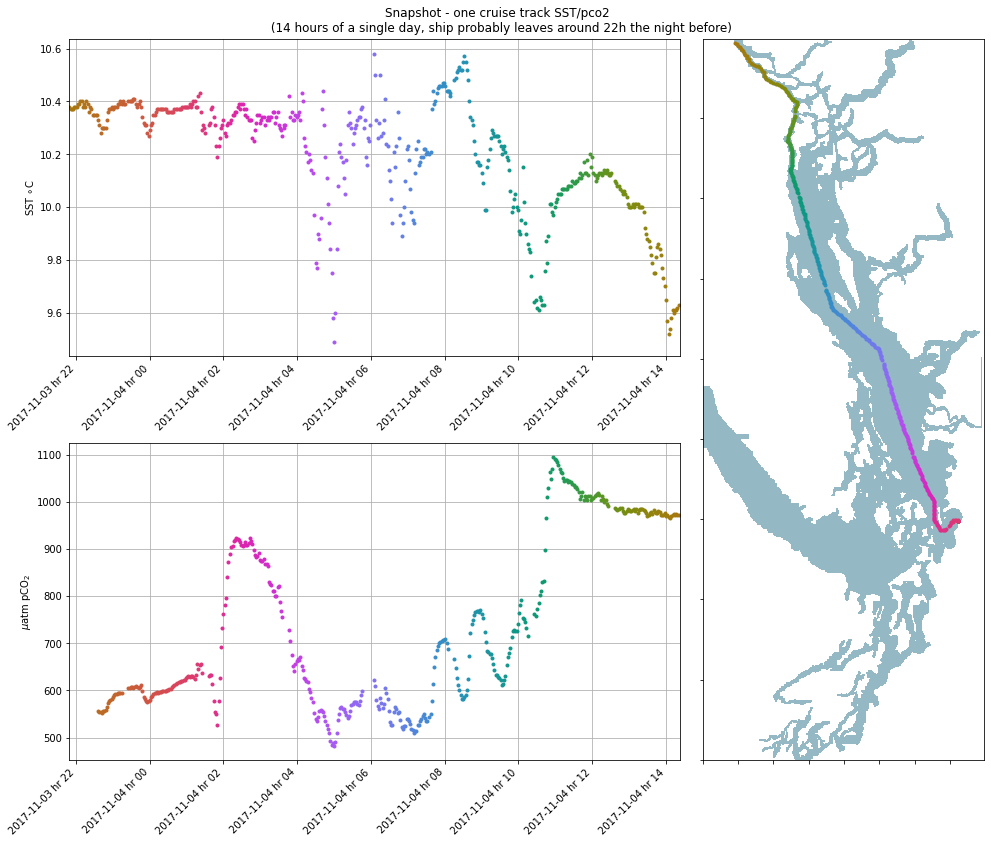

In [41]:
ar = 400; ar2 = 880

w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500

fact = 0.7
fig = plt.figure(figsize = (20*fact,17*fact))

a1 = plt.subplot2grid((2,3),(0,0),colspan = 2)
for i in range(ar,ar2):
    a1.plot(dts_sub51[i],sst_sub51[i], marker = '.',\
                color = tcm((i-ar)/(ar2-ar)))
date_form = DateFormatter("%Y-%m-%d hr %H")
a1.xaxis.set_major_formatter(date_form)
w = plt.xticks(rotation=45, ha='right')
a1.set_ylabel('SST $\circ$C')

a3 = plt.subplot2grid((2,3),(1,0),rowspan = 1, colspan = 2)

for i in range(ar,ar2):
    a3.plot(dts_sub51[i],pco2_sub51[i], marker = '.',\
                color = tcm((i-ar)/(ar2-ar)))
date_form = DateFormatter("%Y-%m-%d hr %H")
a3.xaxis.set_major_formatter(date_form)
w = plt.xticks(rotation=45, ha='right')
a3.set_ylabel('$\mu$atm pCO$_2$')


a2 = plt.subplot2grid((2,3),(0,2), rowspan = 2)
im = a2.pcolormesh(pco2, cmap=cm.cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(a2)
for i in range(ar,ar2):
    a2.plot(i_sub51[i],j_sub51[i], marker = '.',\
                color = tcm((i-ar)/(ar2-ar)))
a2.set_xticklabels([])
a2.set_yticklabels([])

a1.set_xlim([dts_sub51[ar],dts_sub51[ar2]])
a3.set_xlim([dts_sub51[ar],dts_sub51[ar2]])
a1.grid();a3.grid()
plt.suptitle('Snapshot - one cruise track SST/pco2 \n (14 hours of a single day, ship probably leaves around 22h the night before)')
plt.tight_layout()
plt.show()

fig.savefig('onecruise.jpg', transparent = False)

##### Bin by region (both 'known' regions informed by cluster analysis and just objective 'latitude' stripes)

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


Text(0.5, 1.0, 'Columbia cruise tracks')

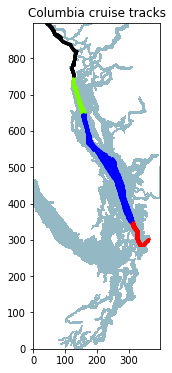

In [28]:
uniquestn = np.unique(decdesc_sub51)


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 0.5
fig = plt.figure(figsize=(12*fact,12*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)

for i in range(0,len(uniquestn)):
    ti = np.floor(uniquestn[i])
    tj = (uniquestn[i]-np.floor(uniquestn[i]))*1000
    if tj<=350:
        ax0.plot(ti,tj,markersize=3, marker = '.', color = 'red')
    if (tj>350) & (tj <=650):
        ax0.plot(ti,tj,markersize=3, marker = '.', color = 'blue')
    if (tj>650) & (tj <=750):
        ax0.plot(ti,tj,markersize=3, marker = '.', color = 'lawngreen')
    if (tj>750):
        ax0.plot(ti,tj,markersize=3, marker = '.', color = 'black')
ax0.set_title('Columbia cruise tracks')




In [29]:
regid = np.zeros_like(j_sub51)
stripeid = np.zeros_like(j_sub51)
for z in range(0,len(regid)):
    tj = j_sub51[z]
    if tj<=350: regid[z] = 1 
    if (tj>350) & (tj <=650): regid[z] = 2
    if (tj>650) & (tj <=750): regid[z] = 3
    if (tj>750): regid[z] = 4
      
    if tj < 300:
        stripeid[z] = 1
    for q in range(0,6):
        if(tj>300+q*100) & (tj<400+q*100):
            stripeid[z] = q+1
    

In [44]:
reg_seasonalmean = np.zeros([4,12])
reg_seasonalsd = np.zeros([4,12])
reg_seasonalmean_mod = np.zeros([4,12])
reg_seasonalsd_mod = np.zeros([4,12])


for r in range(1,5):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (regid == r)]
        reg_seasonalmean[r-1,m-1]= np.nanmean(tpco2)
        reg_seasonalsd[r-1,m-1]= np.nanstd(tpco2)
        
        tpco2 = pco2_mod[(mons == m) & (regid == r)]
        reg_seasonalmean_mod[r-1,m-1]= np.nanmean(tpco2)
        reg_seasonalsd_mod[r-1,m-1]= np.nanstd(tpco2)

stripe_seasonalmean = np.zeros([6,12])
stripe_seasonalsd = np.zeros([6,12])
stripe_seasonalmean_mod = np.zeros([6,12])
stripe_seasonalsd_mod = np.zeros([6,12])

for r in range(1,7):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (stripeid == r)]
        stripe_seasonalmean[r-1,m-1]= np.nanmean(tpco2)
        stripe_seasonalsd[r-1,m-1]= np.nanstd(tpco2)
        
        tpco2 = pco2_mod[(mons == m) & (stripeid == r)]
        stripe_seasonalmean_mod[r-1,m-1]= np.nanmean(tpco2)
        stripe_seasonalsd_mod[r-1,m-1]= np.nanstd(tpco2)

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice


Text(0.5, 1.0, 'disc. observations in region')

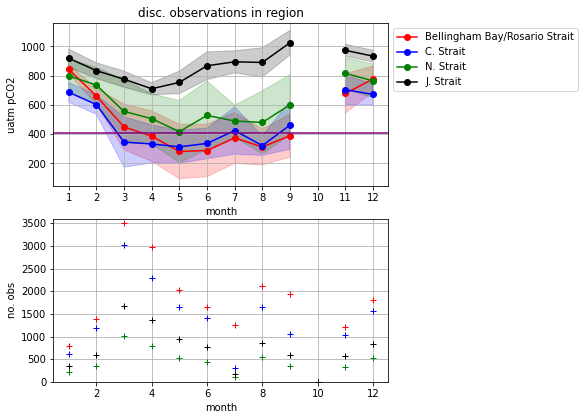

In [31]:
cols = ['r','b','g','k']
labels = ['Bellingham Bay/Rosario Strait', 'C. Strait', 'N. Strait', 'J. Strait']
fact = 0.3
fig, axs = plt.subplots(2,1, figsize=(20*fact, 22*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
for i in range(0,4):
    axs[0].plot(np.arange(1,13,1),reg_seasonalmean[i,:], marker = 'o',
                color = cols[i],linestyle = '-', label = labels[i])
    axs[0].fill_between(np.arange(1,13,1),\
                     reg_seasonalmean[i,:]-reg_seasonalsd[i,:],\
                    reg_seasonalmean[i,:]+reg_seasonalsd[i,:],\
                    alpha = 0.2, color = cols[i])
    axs[0].legend(bbox_to_anchor = [1,1])
    
axs[0].axhline(y=410, color = 'purple')
axs[0].grid(); q = axs[0].set_xticks(np.arange(1,13,1));
axs[0].set_xlabel('month'); axs[0].set_ylabel('uatm pCO2')
axs[0].set_title('monthly pco2 ')

for r in range(1,5):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (regid == r) & ~np.isnan(pco2_sub51)]
        w = np.size(tpco2)
        #print(w)
        axs[1].plot(m,w, color = cols[r-1], marker = '+')
axs[1].set_ylim([0,3600])
axs[1].grid()
axs[1].set_xlabel('month'); axs[1].set_ylabel('no. obs')
axs[0].set_title('disc. observations in region')

## More objective: bin into 100-grid cell (~50km) boxes

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


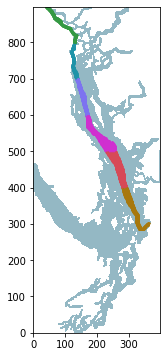

In [32]:
# uniquestn = np.unique(decdesc_sub51)

# tcm = cm.cm.phase
# #color = tcm(1.*(i+shift)/seg

# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 0.5
# fig = plt.figure(figsize=(12*fact,12*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)

# for i in range(0,len(uniquestn)):
#     ti = np.floor(uniquestn[i])
#     tj = (uniquestn[i]-np.floor(uniquestn[i]))*1000

#     if(tj<300):
#         ax0.plot(ti,tj,markersize=3, marker = '.', color = tcm(0/6))

#     for q in range(0,6):
#         if(tj>300+q*100) & (tj<400+q*100):
#             ax0.plot(ti,tj,markersize=3, marker = '.', color = tcm(q/6))

# #ax0.set_title('Columbia cruise tracks')



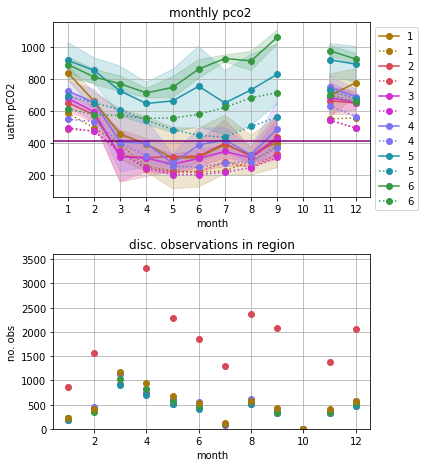

In [47]:
fact = 0.3
fig, axs = plt.subplots(2,1, figsize=(20*fact, 22*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
for i in range(0,6):
    axs[0].plot(np.arange(1,13,1),stripe_seasonalmean[i,:], marker = 'o',
                color = tcm(i/6),linestyle = '-', label = f'{i+1}')
    axs[0].plot(np.arange(1,13,1),stripe_seasonalmean_mod[i,:], marker = 'o',
                color = tcm(i/6),linestyle = ':', label = f'{i+1}')
    axs[0].fill_between(np.arange(1,13,1),\
                     stripe_seasonalmean[i,:]-stripe_seasonalsd[i,:],\
                    stripe_seasonalmean[i,:]+stripe_seasonalsd[i,:],\
                    alpha = 0.2, color = tcm(i/6))
    axs[0].legend(bbox_to_anchor = [1,1])
    
axs[0].axhline(y=410, color = 'purple')
axs[0].grid(); q = axs[0].set_xticks(np.arange(1,13,1));
axs[0].set_xlabel('month'); axs[0].set_ylabel('uatm pCO2')
axs[0].set_title('monthly pco2 ')

for r in range(1,7):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (stripeid == r) & ~np.isnan(pco2_sub51)]
        w = np.size(tpco2)
        #print(w)
        axs[1].plot(m,w, color = tcm(r/6), marker = 'o')
axs[1].set_ylim([0,3600])
axs[1].grid()
axs[1].set_xlabel('month'); axs[1].set_ylabel('no. obs')
axs[1].set_title('disc. observations in region')

plt.tight_layout()

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


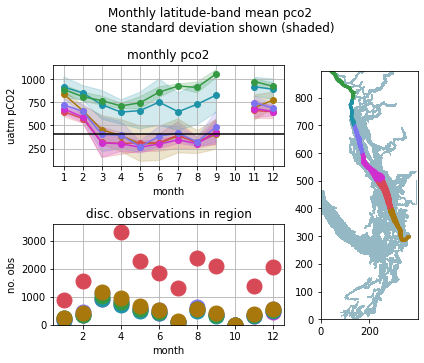

In [46]:
ar = 400; ar2 = 880

w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500

fact = 0.3
fig = plt.figure(figsize = (20*fact,17*fact))

a1 = plt.subplot2grid((2,3),(0,0),colspan = 2)
for i in range(0,6):
    a1.plot(np.arange(1,13,1),stripe_seasonalmean[i,:], marker = 'o',
                color = tcm(i/6),linestyle = '-', label = f'{i+1}')
    a1.fill_between(np.arange(1,13,1),\
                     stripe_seasonalmean[i,:]-stripe_seasonalsd[i,:],\
                    stripe_seasonalmean[i,:]+stripe_seasonalsd[i,:],\
                    alpha = 0.2, color = tcm(i/6))
#a1.legend(bbox_to_anchor = [1,1])
    
a1.axhline(y=410, color = 'k')
a1.grid(); q = a1.set_xticks(np.arange(1,13,1));
a1.set_xlabel('month'); a1.set_ylabel('uatm pCO2')
a1.set_title('monthly pco2')

a3 = plt.subplot2grid((2,3),(1,0),rowspan = 1, colspan = 2)
for r in range(1,7):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (stripeid == r) & ~np.isnan(pco2_sub51)]
        w = np.size(tpco2)
        #print(w)
        a3.plot(m,w, color = tcm(r/6), marker = 'o', markersize = 15)
a3.set_ylim([0,3600])
a3.grid()
a3.set_xlabel('month'); a3.set_ylabel('no. obs')
a3.set_title('disc. observations in region')


a2 = plt.subplot2grid((2,3),(0,2), rowspan = 2)
im = a2.pcolormesh(pco2, cmap=cm.cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(a2)

for i in range(0,len(uniquestn)):
    ti = np.floor(uniquestn[i])
    tj = (uniquestn[i]-np.floor(uniquestn[i]))*1000

    if(tj<300):
        a2.plot(ti,tj,markersize=3, marker = '.', color = tcm(0/6))

    for q in range(0,6):
        if(tj>300+q*100) & (tj<400+q*100):
            a2.plot(ti,tj,markersize=3, marker = '.',  color = tcm(q/6))


plt.suptitle('Monthly latitude-band mean pco2 \n one standard deviation shown (shaded)')
plt.tight_layout()
plt.show()
fig.savefig('monthly.jpg', transparent=False)

13.026771861486152

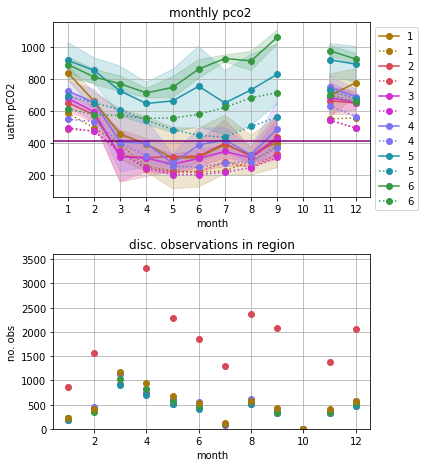

In [48]:
fact = 0.3
fig, axs = plt.subplots(2,1, figsize=(20*fact, 22*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
for i in range(0,6):
    axs[0].plot(np.arange(1,13,1),stripe_seasonalmean[i,:], marker = 'o',
                color = tcm(i/6),linestyle = '-', label = f'{i+1}')
    axs[0].plot(np.arange(1,13,1),stripe_seasonalmean_mod[i,:], marker = 'o',
                color = tcm(i/6),linestyle = ':', label = f'{i+1}')
    axs[0].fill_between(np.arange(1,13,1),\
                     stripe_seasonalmean[i,:]-stripe_seasonalsd[i,:],\
                    stripe_seasonalmean[i,:]+stripe_seasonalsd[i,:],\
                    alpha = 0.2, color = tcm(i/6))
    axs[0].legend(bbox_to_anchor = [1,1])
    
axs[0].axhline(y=410, color = 'purple')
axs[0].grid(); q = axs[0].set_xticks(np.arange(1,13,1));
axs[0].set_xlabel('month'); axs[0].set_ylabel('uatm pCO2')
axs[0].set_title('monthly pco2 ')

for r in range(1,7):
    for m in range(1,13):
        tpco2 = pco2_sub51[(mons == m) & (stripeid == r) & ~np.isnan(pco2_sub51)]
        w = np.size(tpco2)
        #print(w)
        axs[1].plot(m,w, color = tcm(r/6), marker = 'o')
axs[1].set_ylim([0,3600])
axs[1].grid()
axs[1].set_xlabel('month'); axs[1].set_ylabel('no. obs')
axs[1].set_title('disc. observations in region')

plt.tight_layout()

In [ ]:
datear = np.array(datelist)
print(np.shape(datelist))
print(datelist[0])
print(datelist[-1])

t1 = datetime(2014,12,18,0,0,0)
t2 = datetime(2021,2,19,0,0,0)

t = np.arange(t1, t2, timedelta(days=1)).astype(datetime)
q = np.shape(t)

co2_daily = np.zeros(q[0])
print(q)
for i in range(0,q[0]-1):
    #print(t[i])
    tm = (datear >= t[i]) &  (datear<t[i+1])
    #print(tm[tm==1].size)
    tpco2 = swpco2[tm==1]
    co2_daily[i] = (np.nanmean(tpco2))
    
    


In [ ]:
decdate = np.zeros_like(yday)
for i in range(0,len(decdate)):
    if ((year[i] == 2016) | (year[i] == 2020)):
        decdate[i] = year[i]+yday[i]/366
    else:
        decdate[i] = year[i]+yday[i]/365

In [ ]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]
depth = grid.variables['gdept_1d'][:]


qifs_j, qifs_i = geo_tools.find_closest_model_point(-125.222,50.116,nav_lon,nav_lat)
print(qifs_j,qifs_i)

In [ ]:
ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'
ns4_x = 145; ns4_y = 740; ns4_col = 'lawngreen'

w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,12*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor='none')
# ax0.add_patch(rect_ns)
# ax0.text(ns_x+20,ns_y-10,'NS')
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor='none')
# ax0.add_patch(rect_ns)
# ax0.text(ns2_x+20,ns2_y-10,'NS2')
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor='none')
# ax0.add_patch(rect_ns)
# ax0.text(ns3_x+20,ns3_y-10,'NS3')
# rect_ns = Rectangle((ns4_x-10,ns4_y-10),20,20,linewidth=2,edgecolor=ns4_col,facecolor='none')
# ax0.add_patch(rect_ns)
# ax0.text(ns4_x+20,ns4_y-10,'NS4')
ax0.plot(137,761,markersize=20, marker = '*', color = 'orange')
ax0.set_title('Where is QIFS?')

ax0.set_xlim([0,400])
ax0.set_ylim([600,800])

In [ ]:
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


fact = 0.5
fig, axs = plt.subplots(4,1, figsize=(20*fact, 22*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(datear,swpco2, color = 'teal',linestyle = '-')
axs[0].plot(t,co2_daily, color = 'skyblue',linestyle = '-')
axs[0].set_ylabel('$\mu$atm ')
axs[1].plot(datear,TSG_t, color = 'r',linestyle = '-', label = 'temperature')
axs[1].set_ylabel('temperature $\circ$C')
axs1b = axs[1].twinx()
axs1b.plot(datear, TSG_s, color = 'b', label = 'salinity (psu 78)')
axs1b.set_ylabel('salinity (psu 78)')


# axs[2].plot(yday[jan2020],swpco2[jan2020], color = 'teal',linestyle = '-')

# axs[3].plot(yday[jan2020],TSG_t[jan2020], color = 'r',linestyle = '-', label = 'temperature $\circ$C')
# axs1b = axs[3].twinx()
# axs1b.plot(yday[jan2020], TSG_s[jan2020], color = 'b', label = 'salinity (psu 78)')
# axs[3].set_ylabel('temperature $\circ$C')
# axs1b.set_ylabel('salinity (psu 78)')
# axs[3].legend(loc = 3)
# axs1b.legend(loc = 'best')

# for i in range(0,4):
#     axs[i].grid()
# for i in range(0,2):    
#     axs[i].set_ylabel('pCO2 uatm')
    
# axs[0].set_xlabel('date');axs[1].set_xlabel('DOY (year 2020)');
# axs[2].set_xlabel('date');axs[3].set_xlabel('DOY (year 2020)');

# plt.tight_layout()
